In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/retail-sales-analysis/Retailsales.csv


**Loading Data After Concatenation**

In [3]:
df= pd.read_csv(r'/kaggle/input/retail-sales-analysis/Retailsales.csv')
df=df.drop(columns='Unnamed: 0')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Dropping Null Values 

In [6]:
df=df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

**Changing Columns Data Type**

In [10]:
df=df['Order ID'].astype('int')
#This Error is occuring due to some string values in Order ID Column

ValueError: invalid literal for int() with base 10: 'Order ID'

Removing Improper String values which are present due to concatenation

In [11]:
df=df.loc[df['Order ID']!='Order ID']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
df[['Order ID','Quantity Ordered']]=df[['Order ID','Quantity Ordered']].astype(int)
df['Price Each']=df['Price Each'].astype(float)
df['Order Date']=pd.to_datetime(df['Order Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


Creating Month Column

In [15]:
df['Sale']=df['Quantity Ordered']*df['Price Each']
df['Month']=df['Order Date'].dt.month
df['Month Name']=df['Order Date'].dt.month_name()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April


# **What was the best month for sales? How much was earned that month?**

In [16]:
df.sort_values(by=['Month'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name
69397,142996,AAA Batteries (4-pack),1,2.99,2019-01-01 21:01:00,"402 Chestnut St, Boston, MA 02215",2.99,1,January
70773,144300,Apple Airpods Headphones,1,150.00,2019-01-11 14:22:00,"532 River St, San Francisco, CA 94016",150.00,1,January
70772,144299,27in 4K Gaming Monitor,1,389.99,2019-01-31 19:57:00,"942 North St, San Francisco, CA 94016",389.99,1,January
70771,144298,Lightning Charging Cable,1,14.95,2019-01-13 12:00:00,"709 North St, Los Angeles, CA 90001",14.95,1,January
70770,144297,Flatscreen TV,1,300.00,2019-01-21 14:37:00,"437 Madison St, Atlanta, GA 30301",300.00,1,January
...,...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,2019-12-06 18:05:00,"594 9th St, Dallas, TX 75001",149.99,12,December
47163,311694,AAA Batteries (4-pack),1,2.99,2019-12-19 07:35:00,"905 11th St, Atlanta, GA 30301",2.99,12,December
47164,311695,Wired Headphones,1,11.99,2019-12-21 21:06:00,"107 Lakeview St, San Francisco, CA 94016",11.99,12,December
47142,311673,USB-C Charging Cable,1,11.95,2019-12-26 22:24:00,"169 Forest St, San Francisco, CA 94016",11.95,12,December


In [17]:
bestmonth=df.groupby(['Month','Month Name']).agg(
Total_sale=('Sale','sum'),
Avg_sale=('Sale','mean'))
bestmonth.reset_index()

,Month,Month Name,Total_sale,Avg_sale
0,1,January,1822256.73,187.687376
1,2,February,2202022.42,183.884962
2,3,March,2807100.38,185.250471
3,4,April,3390670.24,185.495390
4,5,May,3152606.75,190.305852
5,6,June,2577802.26,190.187565
6,7,July,2647775.76,185.249826
7,8,August,2244467.88,187.648849
8,9,September,2097560.13,180.497387
9,10,October,3736726.88,184.238580


In [18]:
bestmonth.to_csv('bestmonth.csv')
bm=pd.read_csv(r'/kaggle/working/bestmonth.csv')
bm=bm.sort_values(by='Total_sale',ascending=False)
bm

,Month,Month Name,Total_sale,Avg_sale
11,12,December,4613443.34,184.655913
9,10,October,3736726.88,184.238580
3,4,April,3390670.24,185.495390
10,11,November,3199603.20,182.074956
4,5,May,3152606.75,190.305852
2,3,March,2807100.38,185.250471
6,7,July,2647775.76,185.249826
5,6,June,2577802.26,190.187565
7,8,August,2244467.88,187.648849
1,2,February,2202022.42,183.884962


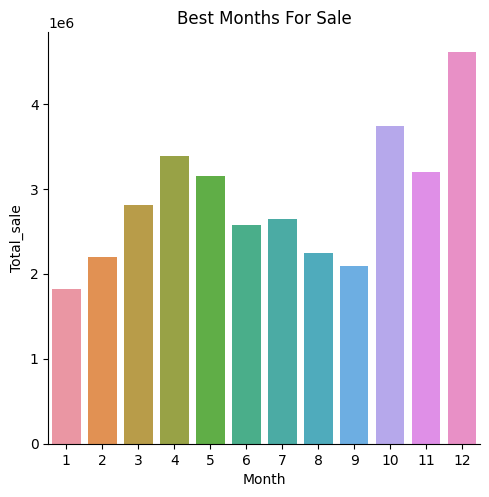

In [56]:
sns.catplot(x='Month',y='Total_sale',data=bm,kind='bar')
plt.title('Best Months For Sale')
plt.show()

* Best month for sales is = **December**
* Total Earning of December = **4613443.34**

# Feature Engineering for What city sold the most product?

In [20]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95,4,April
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99,4,April
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95,4,April
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00,4,April
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",11.99,4,April


Splitting Address on basis of "," and using Expand to convert it into DataFrame

In [21]:
adf=df['Purchase Address'].str.split(',',expand=True)
adf

,0,1,2
0,917 1st St,Dallas,TX 75001
2,682 Chestnut St,Boston,MA 02215
3,669 Spruce St,Los Angeles,CA 90001
4,669 Spruce St,Los Angeles,CA 90001
5,333 8th St,Los Angeles,CA 90001
...,...,...,...
186845,840 Highland St,Los Angeles,CA 90001
186846,216 Dogwood St,San Francisco,CA 94016
186847,220 12th St,San Francisco,CA 94016
186848,511 Forest St,San Francisco,CA 94016


Extracting City

In [22]:
df['City']=adf[1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,Los Angeles


In [23]:
citysales=df.groupby('City').agg(
Total_orders=('Quantity Ordered','sum'),
Sales=('Sale','sum'))
citysales=citysales.sort_values(by='Total_orders',ascending= False).reset_index()
citysales

,City,Total_orders,Sales
0,San Francisco,50239,8262203.91
1,Los Angeles,33289,5452570.80
2,New York City,27932,4664317.43
3,Boston,22528,3661642.01
4,Dallas,16730,2767975.40
5,Atlanta,16602,2795498.58
6,Seattle,16553,2747755.48
7,Portland,14053,2320490.61
8,Austin,11153,1819581.75


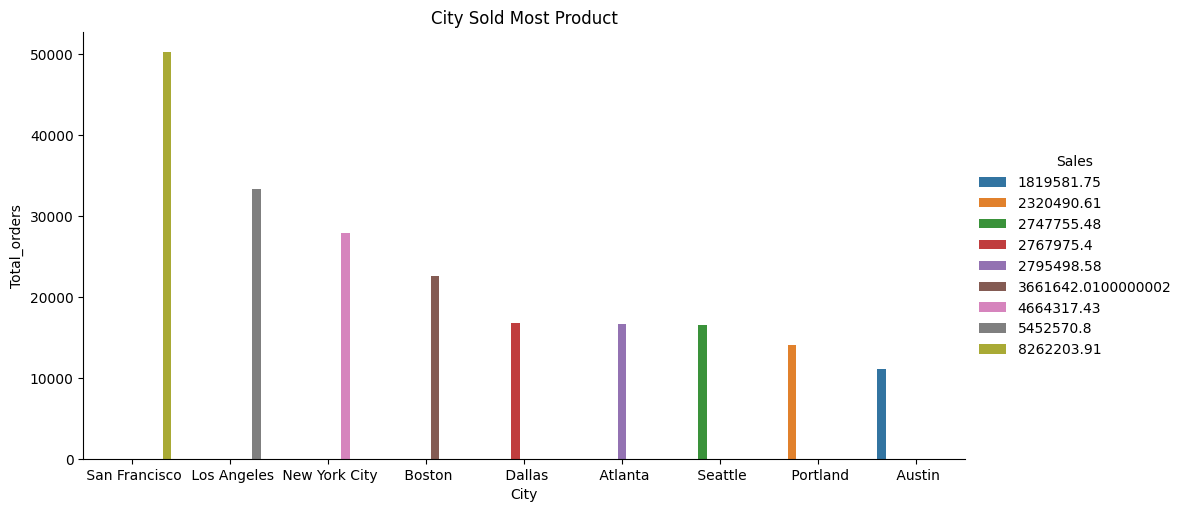

In [57]:
sns.catplot(data=citysales,x='City',y='Total_orders',kind='bar',aspect=2,hue='Sales')
plt.title('City Sold Most Product')
plt.show()

* City Sold Most Products= **San Francisco** with **50239** Total Orders

# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,Los Angeles


Extracting Hour From Order Date

In [26]:
df['Hour']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,April,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,April,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,April,Los Angeles,9


In [27]:
traffic=df.groupby('Hour').agg(
Total_orders=('Quantity Ordered','sum'),
Sales=('Sale','sum')).reset_index()
traffic

,Hour,Total_orders,Sales
0,0,4428,713721.27
1,1,2619,460866.88
2,2,1398,234851.44
3,3,928,145757.89
4,4,937,162661.01
5,5,1493,230679.82
6,6,2810,448113.00
7,7,4556,744854.12
8,8,7002,1192348.97
9,9,9816,1639030.58


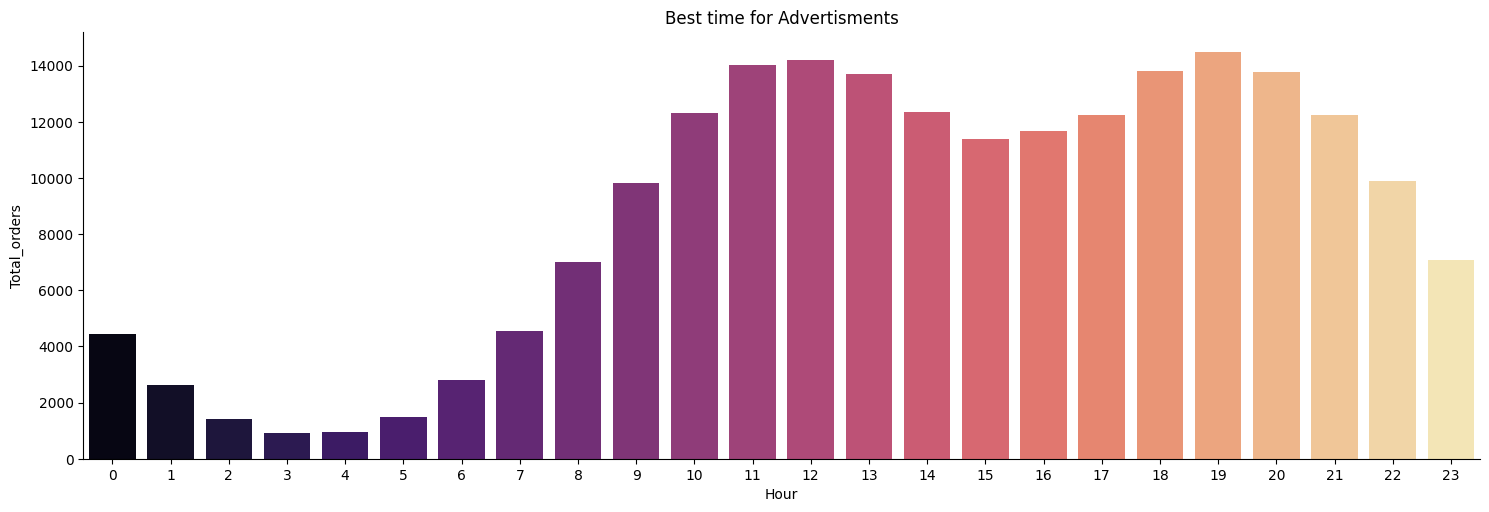

In [58]:
sns.catplot(data=traffic,x='Hour',y='Total_orders',kind='bar',aspect=3,palette='magma')
plt.title('Best time for Advertisments')
plt.show()

* The time we should display advertisemens to maximize the likelihood of customer’s buying product is: From **11Am-1Pm** & From **6Pm-8Pm**

# What product sold the most? Why do you think it sold the most?

In [29]:
productsold=df.groupby('Product').agg(Quantity=('Quantity Ordered','sum'))
productsold=productsold.sort_values(by='Quantity',ascending=False).reset_index()
productsold.head(10)

,Product,Quantity
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


* Most Sold Products are:
1. AA Batteries (4-pack)
1. USB-C Charging Cable
1. Lightning Charging Cable
1. Wired Headphones
1. Apple Airpods Headphones
**Reason**: Very Common usage products and available at cheap prices

# What Products are most often sold together ?
**Same as in Amazon's** Customer Who Bought this item also bought this Item. 

In [33]:
# All Duplicate Order ID 
df = df[df['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,Los Angeles,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,April,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,April,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,April,Boston,11
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,9,September,Atlanta,20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,9,September,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,9,September,Atlanta,0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,9,September,San Francisco,13


**Group Different Products With Same Order ID :**
Let's create a new column that contains different Products with the same Order ID. By using transform method.

In [34]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,Month Name,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,April,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,April,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,April,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,April,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,April,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,April,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,4,April,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",600.00,4,April,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,4,April,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",11.95,4,April,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


# **Products sold Together**

Counting Pairs of Products

In [40]:
from itertools import combinations
from collections import Counter

count = Counter()
row_list = []
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

count=count.most_common(10)
count

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 271),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 193),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 146),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 109),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 101),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 86),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 75),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  50),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  20),
 (('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'),
  17)]

In [52]:
mcp=pd.DataFrame(count).reset_index(drop=True).rename(columns={0:'Products',1:'Count'})
mcp

,Products,Count
0,"(Google Phone, USB-C Charging Cable, Wired Hea...",271
1,"(iPhone, Lightning Charging Cable, Wired Headp...",193
2,"(iPhone, Lightning Charging Cable, Apple Airpo...",146
3,"(Google Phone, USB-C Charging Cable, Bose Soun...",109
4,"(Vareebadd Phone, USB-C Charging Cable, Wired ...",101
5,"(iPhone, Apple Airpods Headphones, Wired Headp...",86
6,"(Google Phone, Bose SoundSport Headphones, Wir...",75
7,"(Vareebadd Phone, USB-C Charging Cable, Bose S...",50
8,"(USB-C Charging Cable, Bose SoundSport Headpho...",20
9,"(Lightning Charging Cable, Apple Airpods Headp...",17
